In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# parameters
kappa = 0.15   
theta = 0.05   
sigma = 0.02  
r0 = 0.03       
T = 10.0          
dt = 1/252        
N = int(T / dt)   
n_paths = 1     

In [3]:
# Euler-Maruyama discretisation
# np.random.seed(888)
r = np.zeros((N + 1, n_paths))
r[0] = r0
time = np.linspace(0, T, N + 1)
for i in range(N):
    dr = kappa * (theta - r[i]) * dt + sigma * np.sqrt(dt) * np.random.randn(n_paths)
    r[i + 1] = r[i] + dr

In [4]:
def vasicek_bond_price(r_t, t, T, kappa, theta, sigma):
    """
    Zero-coupon bond price
    """
    B = (1 - np.exp(-kappa * (T - t))) / kappa
    A = np.exp((theta - sigma**2 / (2 * kappa**2)) * (B - (T - t))
               - (sigma**2 / (4 * kappa)) * B**2)
    return A * np.exp(-B * r_t)

In [5]:
# current term structure
maturities = np.linspace(0.5, 10, 20)
bond_prices = [vasicek_bond_price(r0, 0, Tm, kappa, theta, sigma) for Tm in maturities]
yields = -np.log(bond_prices) / maturities

Text(0, 0.5, 'Short rate')

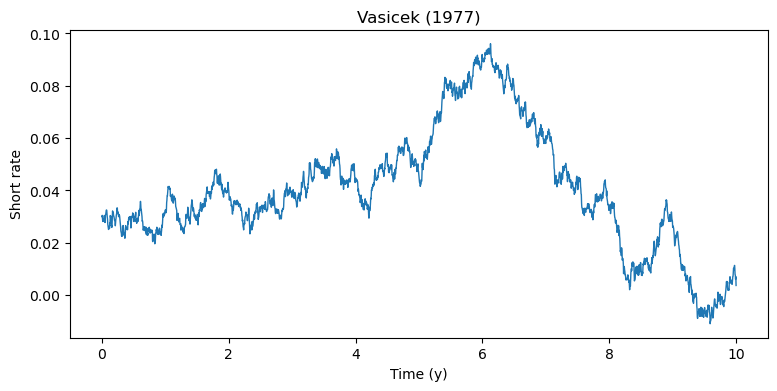

In [6]:
plt.figure(figsize=(9, 4))
plt.plot(time, r, lw=1)
plt.title("Vasicek (1977)")
plt.xlabel("Time (y)")
plt.ylabel("Short rate")
# as you see, negativity is here

Text(0, 0.5, 'Yield')

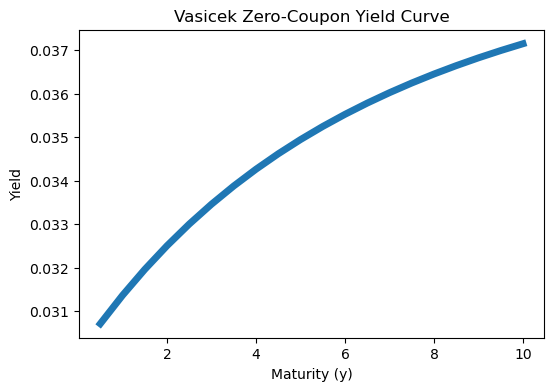

In [7]:
# yield curve
plt.figure(figsize=(6, 4))
plt.plot(maturities, yields, lw=5)
plt.title("Vasicek Zero-Coupon Yield Curve")
plt.xlabel("Maturity (y)")
plt.ylabel("Yield")